In [1]:
library(aod)
library(ggplot2)

Loading required package: aod
Loading required package: ggplot2


### Examples

### Description of the Data

In [2]:
mydata <- read.csv("./datasets/binary.csv")

## convert rank to a factor (categorical variable)
mydata$rank <- factor(mydata$rank)

## view first few rows
head(mydata)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [3]:
summary(mydata)

     admit             gre             gpa        rank   
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   1: 61  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   2:151  
 Median :0.0000   Median :580.0   Median :3.395   3:121  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   4: 67  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670          
 Max.   :1.0000   Max.   :800.0   Max.   :4.000          

In [4]:
xtabs(~rank + admit, data = mydata)

    admit
rank  0  1
   1 28 33
   2 97 54
   3 93 28
   4 55 12

### Analysis methods you might consider

### Using the Probit Model

In [5]:
myprobit <- glm(admit ~ gre + gpa + rank, family = binomial(link = "probit"), data = mydata)

## model summary
summary(myprobit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial(link = "probit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6163  -0.8710  -0.6389   1.1560   2.1035  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.386836   0.673946  -3.542 0.000398 ***
gre          0.001376   0.000650   2.116 0.034329 *  
gpa          0.477730   0.197197   2.423 0.015410 *  
rank2       -0.415399   0.194977  -2.131 0.033130 *  
rank3       -0.812138   0.208358  -3.898 9.71e-05 ***
rank4       -0.935899   0.245272  -3.816 0.000136 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.41  on 394  degrees of freedom
AIC: 470.41

Number of Fisher Scoring iterations: 4


In [6]:
confint(myprobit)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-3.7201050682,-1.076327713
gre,0.0001104101,0.002655157
gpa,0.0960654793,0.862610221
rank2,-0.7992113929,-0.032995019
rank3,-1.2230955861,-0.405008112
rank4,-1.4234218227,-0.459538829


In [7]:
wald.test(b = coef(myprobit), Sigma = vcov(myprobit), Terms = 4:6)

Wald test:
----------

Chi-squared test:
X2 = 21.4, df = 3, P(> X2) = 8.9e-05

In [8]:
l <- cbind(0, 0, 0, 1, -1, 0)
wald.test(b = coef(myprobit), Sigma = vcov(myprobit), L = l)

Wald test:
----------

Chi-squared test:
X2 = 5.6, df = 1, P(> X2) = 0.018

In [9]:
newdata <- data.frame(gre = rep(seq(from = 200, to = 800, length.out = 100), 4 * 4), 
                      gpa = rep(c(2.5, 3, 3.5, 4), each = 100 * 4), rank = factor(rep(rep(1:4, each = 100), 4)))

head(newdata)

gre,gpa,rank
200.0000,2.5,1
206.0606,2.5,1
212.1212,2.5,1
218.1818,2.5,1
224.2424,2.5,1
230.3030,2.5,1


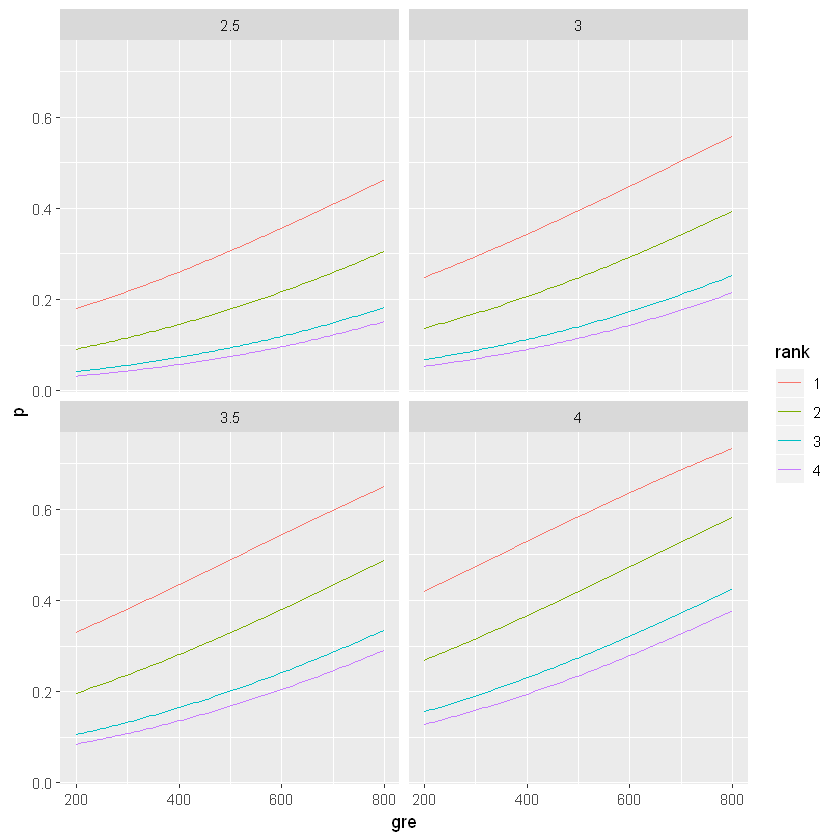

In [10]:
newdata[, c("p", "se")] <- predict(myprobit, newdata, type = "response", se.fit = TRUE)[-3]
ggplot(newdata, aes(x = gre, y = p, colour = rank)) + geom_line() + facet_wrap(~gpa)

In [11]:
## change in deviance
with(myprobit, null.deviance - deviance)

[1] 41.56335

In [12]:
## change in degrees of freedom
with(myprobit, df.null - df.residual)

[1] 5

In [13]:
## chi square test p-value
with(myprobit, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 7.218932e-08

In [14]:
logLik(myprobit)

'log Lik.' -229.2066 (df=6)

### Things to consider